<a href="https://colab.research.google.com/github/RogerioSFFilho/ProjetosT-D/blob/main/TESTE_A_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## 1) Hipótese Nula (H0) e Hipótese Alternativa (H1)

- **H0**: não há diferença/efeito entre os grupos (ex.: taxas de conversão iguais).  
- **H1**: existe diferença/efeito (ex.: uma versão tem conversão maior).  

Assumimos H0 como verdade inicial e buscamos evidências nos dados para **rejeitá-la** em favor de H1.


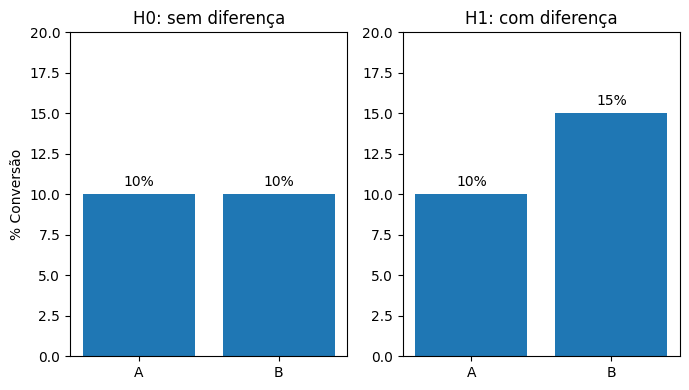


## 2) Valor-p (p-valor)

O **p-valor** é a probabilidade de observar um resultado **tão extremo quanto** (ou mais)
o observado **assumindo H0 verdadeira**.  
Se p-valor < α, rejeitamos H0.


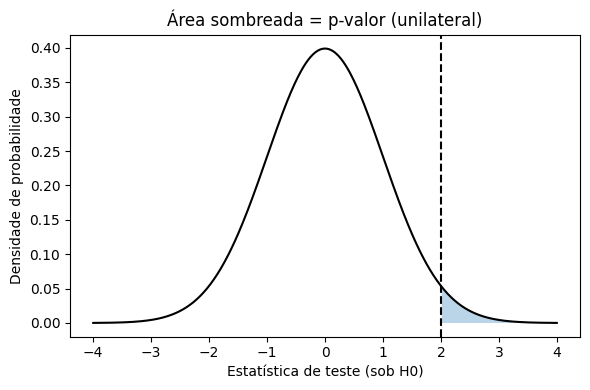


## 3) Nível de significância (α)

**α** é a taxa de falso positivo (erro Tipo I) que aceitamos.  
Para **α=0,05** em **uma cauda**, o ponto crítico é ≈ **1,645**.


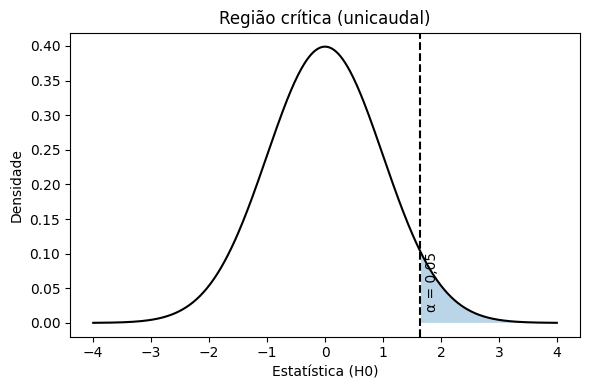


## 4) Teste unilateral vs bilateral

- **Unilateral:** α concentrado em **uma** cauda (ex.: queremos detectar **aumento**).  
- **Bilateral:** α dividido em **duas** caudas (detecta qualquer diferença: ↑ ou ↓).


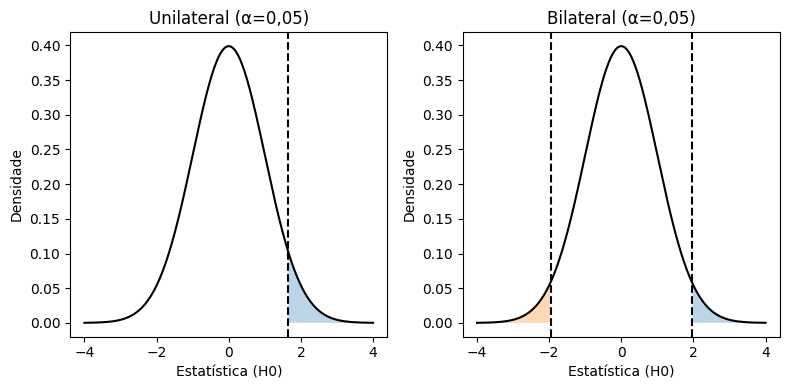


## 5) Poder estatístico (power)

**Poder** = P(rejeitar H0 | H1 verdadeira) = **1 − β**.  
Aumenta com **amostras maiores**, **efeitos maiores** e **α** menos rigoroso.


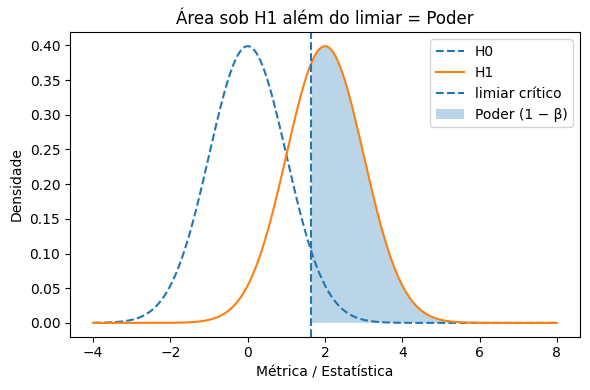


## 6) Tamanho do efeito

Efeitos **maiores** separam mais as distribuições de H0 e H1, facilitando a detecção.


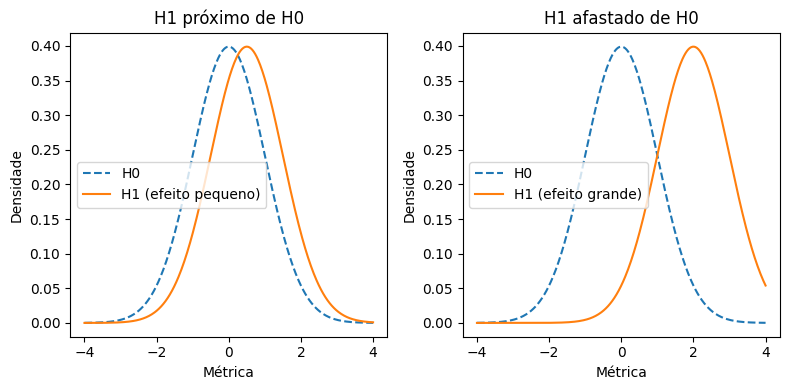


## 7) Tamanho da amostra

A variância da média amostral é ≈ σ²/**n**.  
**Mais amostra → menor dispersão** (intervalos mais estreitos).


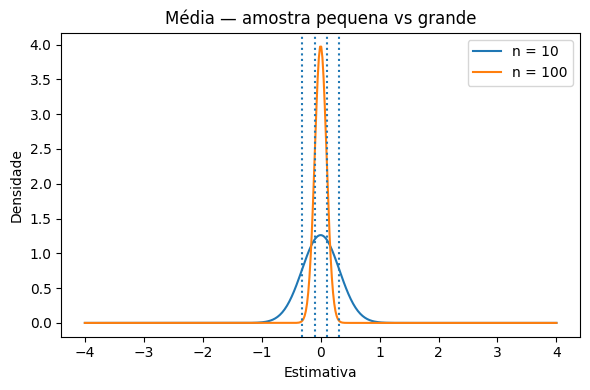


## 8) Erros do Tipo I e Tipo II

- **Erro Tipo I (α)**: rejeitar H0 quando ela é verdadeira (**falso positivo**).  
- **Erro Tipo II (β)**: não rejeitar H0 quando H1 é verdadeira (**falso negativo**).


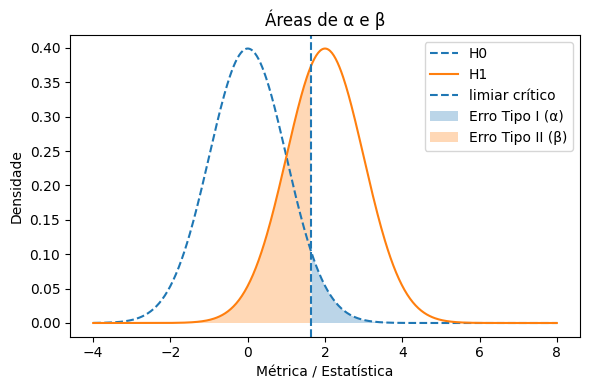

In [5]:
# @title Interface interativa com múltiplas abas para conceitos de Teste A/B
%%capture --no-display

# Bloco 0: imports e estilo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint

# Bloco 1: Hipótese Nula (H0) e Alternativa (H1)
display(Markdown(
"""
## 1) Hipótese Nula (H0) e Hipótese Alternativa (H1)

- **H0**: não há diferença/efeito entre os grupos (ex.: taxas de conversão iguais).
- **H1**: existe diferença/efeito (ex.: uma versão tem conversão maior).

Assumimos H0 como verdade inicial e buscamos evidências nos dados para **rejeitá-la** em favor de H1.
"""
))

# Exemplo visual simples (métricas em %)
metric_A = 10
metric_B_H0 = 10
metric_B_H1 = 15

fig, axes = plt.subplots(1, 2, figsize=(7, 4))
axes[0].bar(['A', 'B'], [metric_A, metric_B_H0])
axes[0].set_ylim(0, 20); axes[0].set_title("H0: sem diferença"); axes[0].set_ylabel("% Conversão")
for i, v in enumerate([metric_A, metric_B_H0]): axes[0].text(i, v+0.5, f"{v}%", ha='center')

axes[1].bar(['A', 'B'], [metric_A, metric_B_H1])
axes[1].set_ylim(0, 20); axes[1].set_title("H1: com diferença")
for i, v in enumerate([metric_A, metric_B_H1]): axes[1].text(i, v+0.5, f"{v}%", ha='center')

plt.tight_layout(); plt.show()

# Bloco 2: Valor-p (p-valor)
display(Markdown(
"""
## 2) Valor-p (p-valor)

O **p-valor** é a probabilidade de observar um resultado **tão extremo quanto** (ou mais)
o observado **assumindo H0 verdadeira**.
Se p-valor < α, rejeitamos H0.
"""
))

x = np.linspace(-4, 4, 400)
pdf = (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * x**2)  # Normal(0,1)
z_obs = 2.0  # exemplo
mask = x >= z_obs

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, pdf, color='black')
ax.fill_between(x, 0, pdf, where=mask, alpha=0.3)
ax.axvline(z_obs, linestyle='--', color='black')
ax.set_title("Área sombreada = p-valor (unilateral)")
ax.set_xlabel("Estatística de teste (sob H0)")
ax.set_ylabel("Densidade de probabilidade")
plt.tight_layout(); plt.show()

# Bloco 3: Nível de significância (α)
display(Markdown(
"""
## 3) Nível de significância (α)

**α** é a taxa de falso positivo (erro Tipo I) que aceitamos.
Para **α=0,05** em **uma cauda**, o ponto crítico é ≈ **1,645**.
"""
))

x = np.linspace(-4, 4, 400)
pdf = (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * x**2)
crit = 1.645
mask = x >= crit

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, pdf, color='black')
ax.fill_between(x, 0, pdf, where=mask, alpha=0.3)
ax.axvline(crit, linestyle='--', color='black')
ax.text(crit+0.08, 0.02, "α = 0,05", rotation=90)
ax.set_title("Região crítica (unicaudal)")
ax.set_xlabel("Estatística (H0)")
ax.set_ylabel("Densidade")
plt.tight_layout(); plt.show()

# Bloco 4: Unilateral vs Bilateral
display(Markdown(
"""
## 4) Teste unilateral vs bilateral

- **Unilateral:** α concentrado em **uma** cauda (ex.: queremos detectar **aumento**).
- **Bilateral:** α dividido em **duas** caudas (detecta qualquer diferença: ↑ ou ↓).
"""
))

x = np.linspace(-4, 4, 400)
pdf = (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * x**2)
crit_one = 1.645   # α=0.05, 1 cauda
crit_two = 1.96    # α=0.05, 2 caudas

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
# Unilateral
axes[0].plot(x, pdf, color='black')
axes[0].fill_between(x, 0, pdf, where=(x >= crit_one), alpha=0.3)
axes[0].axvline(crit_one, linestyle='--', color='black')
axes[0].set_title("Unilateral (α=0,05)")
axes[0].set_xlabel("Estatística (H0)")
axes[0].set_ylabel("Densidade")
# Bilateral
axes[1].plot(x, pdf, color='black')
axes[1].fill_between(x, 0, pdf, where=(x >= crit_two), alpha=0.3)
axes[1].fill_between(x, 0, pdf, where=(x <= -crit_two), alpha=0.3)
axes[1].axvline(crit_two, linestyle='--', color='black')
axes[1].axvline(-crit_two, linestyle='--', color='black')
axes[1].set_title("Bilateral (α=0,05)")
axes[1].set_xlabel("Estatística (H0)")
axes[1].set_ylabel("Densidade")
plt.tight_layout(); plt.show()

# Bloco 5: Poder estatístico
display(Markdown(
"""
## 5) Poder estatístico (power)

**Poder** = P(rejeitar H0 | H1 verdadeira) = **1 − β**.
Aumenta com **amostras maiores**, **efeitos maiores** e **α** menos rigoroso.
"""
))

x = np.linspace(-4, 8, 500)
pdf_H0 = (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * x**2)
mu1 = 2.0  # deslocamento ilustrativo da H1
pdf_H1 = (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * (x - mu1)**2)
thr = 1.645  # limiar crítico (α=0,05 unicaudal)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, pdf_H0, linestyle='--', label="H0")
ax.plot(x, pdf_H1, label="H1")
ax.axvline(thr, linestyle='--', label="limiar crítico")
ax.fill_between(x, 0, pdf_H1, where=(x >= thr), alpha=0.3, label="Poder (1 − β)")
ax.set_xlabel("Métrica / Estatística")
ax.set_ylabel("Densidade")
ax.legend()
ax.set_title("Área sob H1 além do limiar = Poder")
plt.tight_layout(); plt.show()

# Bloco 6: Tamanho do efeito
display(Markdown(
"""
## 6) Tamanho do efeito

Efeitos **maiores** separam mais as distribuições de H0 e H1, facilitando a detecção.
"""
))

x = np.linspace(-4, 4, 400)
pdf_H0 = (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * x**2)
pdf_small = (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * (x - 0.5)**2)  # efeito pequeno
pdf_large = (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * (x - 2.0)**2)  # efeito grande

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
# Efeito pequeno
axes[0].plot(x, pdf_H0, linestyle='--', label="H0")
axes[0].plot(x, pdf_small, label="H1 (efeito pequeno)")
axes[0].set_title("H1 próximo de H0")
axes[0].set_xlabel("Métrica"); axes[0].set_ylabel("Densidade"); axes[0].legend()
# Efeito grande
axes[1].plot(x, pdf_H0, linestyle='--', label="H0")
axes[1].plot(x, pdf_large, label="H1 (efeito grande)")
axes[1].set_title("H1 afastado de H0")
axes[1].set_xlabel("Métrica"); axes[1].set_ylabel("Densidade"); axes[1].legend()
plt.tight_layout(); plt.show()

# Bloco 7: Tamanho da amostra
display(Markdown(
"""
## 7) Tamanho da amostra

A variância da média amostral é ≈ σ²/**n**.
**Mais amostra → menor dispersão** (intervalos mais estreitos).
"""
))

x = np.linspace(-4, 4, 400)
n_small, n_large = 10, 100
pdf_small = (1/np.sqrt(2*np.pi*(1/n_small))) * np.exp(-0.5 * (x**2) * n_small)
pdf_large = (1/np.sqrt(2*np.pi*(1/n_large))) * np.exp(-0.5 * (x**2) * n_large)
sd_small, sd_large = 1/np.sqrt(n_small), 1/np.sqrt(n_large)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, pdf_small, label=f"n = {n_small}")
ax.plot(x, pdf_large, label=f"n = {n_large}")
ax.axvline(sd_small, linestyle=':'); ax.axvline(-sd_small, linestyle=':')
ax.axvline(sd_large, linestyle=':'); ax.axvline(-sd_large, linestyle=':')
ax.set_title("Média — amostra pequena vs grande")
ax.set_xlabel("Estimativa"); ax.set_ylabel("Densidade"); ax.legend()
plt.tight_layout(); plt.show()

# Bloco 8: Erros do Tipo I e Tipo II
display(Markdown(
"""
## 8) Erros do Tipo I e Tipo II

- **Erro Tipo I (α)**: rejeitar H0 quando ela é verdadeira (**falso positivo**).
- **Erro Tipo II (β)**: não rejeitar H0 quando H1 é verdadeira (**falso negativo**).
"""
))

x = np.linspace(-4, 8, 500)
pdf_H0 = (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * x**2)
mu1 = 2.0
pdf_H1 = (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * (x - mu1)**2)
thr = 1.645  # limiar crítico (α=0,05 unicaudal)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, pdf_H0, linestyle='--', label="H0")
ax.plot(x, pdf_H1, label="H1")
ax.axvline(thr, linestyle='--', label="limiar crítico")
ax.fill_between(x, 0, pdf_H0, where=(x >= thr), alpha=0.3, label="Erro Tipo I (α)")
ax.fill_between(x, 0, pdf_H1, where=(x < thr),  alpha=0.3, label="Erro Tipo II (β)")
ax.set_xlabel("Métrica / Estatística"); ax.set_ylabel("Densidade"); ax.legend()
ax.set_title("Áreas de α e β")
plt.tight_layout(); plt.show()

#Análise de Teste A/B de Campanha de Marketing

##Introdução

Empresas de marketing frequentemente realizam testes A/B para avaliar a efetividade de diferentes estratégias de campanha. Neste contexto, a maior parte dos usuários é exposta a anúncios (grupo de teste “ad”) enquanto uma pequena parcela vê apenas uma campanha de utilidade pública ou nenhum anúncio (grupo de controle “psa”). O objetivo é determinar se a campanha com anúncios foi bem-sucedida, quantificar a diferença observada entre o grupo que viu anúncios e o grupo de controle, e verificar se essa diferença é estatisticamente significativa
yellow-dune.kreatewebsites.com
. Em outras palavras, vamos avaliar se a exposição a anúncios aumenta a taxa de conversão de usuários (compra do produto) de forma significativa em relação ao cenário sem anúncios.

##Carregamento e Preparação dos Dados

Para esta análise, utilizamos o dataset “Marketing A/B Testing” do Kaggle, que contém informações de aproximadamente 588 mil usuários. Cada entrada indica se o usuário viu um anúncio ou apenas o PSA, e se ele converteu (realizou a compra) ou não, além de alguns dados sobre quantidade de anúncios vistos e quando os anúncios foram exibidos. A seguir, carregamos os dados e realizamos uma inspeção inicial:

In [6]:
import pandas as pd
from IPython.display import Markdown, display

# Carrega o dataset (assumindo que o arquivo CSV já está disponível no ambiente)
df = pd.read_csv('drive/MyDrive/DADOS/marketing_AB.csv')

# Visualiza as primeiras linhas
display(df.head(5))

# Informações gerais do dataframe
display(df.info())

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


None

In [7]:
# Remove a coluna de índice gerada automaticamente (se presente)
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

# Verifica colunas após limpeza
display(df.columns.tolist())

['user id',
 'test group',
 'converted',
 'total ads',
 'most ads day',
 'most ads hour']

##Os principais campos que usaremos são:

`test_group`: indica o grupo do usuário (`"ad"` para exposto a anúncio, `"psa"` para controle).

`converted`: indica se o usuário comprou o produto (`True` para convertido, `False` caso contrário).

##Análise Exploratória: Taxa de Conversão por Grupo

Primeiro, vamos calcular a taxa de conversão em cada grupo. A taxa de conversão é a porcentagem de usuários que efetuaram a compra dentro de cada grupo. Também contamos o número de usuários em cada grupo para contextualizar os resultados:

In [8]:
# Garantir que a coluna 'converted' seja booleana para facilitar cálculos
df['converted'] = df['converted'].astype(bool)

# Número de usuários em cada grupo (tamanho do grupo)
group_counts = df['test group'].value_counts()
display("Tamanho de cada grupo:\n", group_counts)

# Número de conversões (True) em cada grupo
conv_counts = df[df['converted'] == True]['test group'].value_counts()
display("Número de conversões em cada grupo:\n", conv_counts)

# Calcula a taxa de conversão (%) em cada grupo
conv_rate_ad = conv_counts['ad'] / group_counts['ad'] * 100
conv_rate_psa = conv_counts['psa'] / group_counts['psa'] * 100
display(f"Taxa de conversão - Grupo 'ad': {conv_rate_ad:.2f}%")
display(f"Taxa de conversão - Grupo 'psa': {conv_rate_psa:.2f}%")

'Tamanho de cada grupo:\n'

,count
test group,
ad,564577
psa,23524


'Número de conversões em cada grupo:\n'

,count
test group,
ad,14423
psa,420


"Taxa de conversão - Grupo 'ad': 2.55%"

"Taxa de conversão - Grupo 'psa': 1.79%"

Resultado esperado: O grupo “ad” possui uma taxa de conversão em torno de 2,5%, enquanto o grupo “psa” (controle) apresenta cerca de 1,8% de conversão. Por exemplo, com base no dataset completo: Grupo ad: 2,55% de conversão; Grupo psa: 1,79%. Isso indica que uma proporção maior de usuários que viram anúncios acabaram comprando o produto, em comparação com aqueles que não viram anúncios.

Em números absolutos, dado que o dataset contém 564.577 usuários no grupo ad e 23.524 no grupo psa, as conversões aproximadas seriam:

*   Cerca de 14,4 mil conversões no grupo ad.
*   Cerca de 420 conversões no grupo psa.

Essa diferença de resultados sugere que os anúncios podem ter tido um impacto positivo nas conversões. O grupo exposto a anúncios teve uma taxa de conversão aproximadamente 0,76 ponto percentual maior que o grupo de controle (2,55% vs 1,79%), o que representa um aumento relativo de cerca de 42% na taxa de conversão. Em outras palavras, proporcionalmente bem mais usuários converteram quando viram anúncios.

No entanto, apenas observar uma diferença nas porcentagens não garante que ela seja estatisticamente significativa. É possível que flutuações aleatórias expliquem parte dessa diferença. Para tirar uma conclusão sólida, precisamos realizar um teste de hipótese estatístico para verificar se a vantagem do grupo ad sobre o grupo psa é significante do ponto de vista estatístico

##Teste de Significância Estatística (Teste A/B)

Para verificar se a diferença observada nas taxas de conversão é estatisticamente significativa, formulamos as hipóteses e realizamos um teste apropriado de proporções entre dois grupos:

*  Hipótese Nula (H₀): Não há diferença significativa na taxa de conversão entre
usuários expostos a anúncios e usuários do controle (psa).
Em notação estatística,
𝑝𝑎𝑑 = 𝑝𝑝𝑠𝑎

*  Hipótese Alternativa (H₁): A taxa de conversão do grupo exposto a anúncios é maior que a do grupo de controle. Aqui esperamos 𝑝𝑎𝑑 > 𝑝𝑝𝑠𝑎 , indicando sucesso da campanha.

Vamos usar um teste Z de duas proporções para comparar 𝑝𝑎𝑑 e 𝑝𝑝𝑠𝑎.Esse teste assume amostras grandes (o que é válido aqui, dado o tamanho de ambos os grupos) e verifica se a diferença observada entre as proporções é maior do que seria esperado ao acaso. Definimos o nível de significância α = 0,05 (5%).

In [9]:
import statsmodels.api as sm

# Define contagens de sucesso (conversões) e tamanho de cada amostra (grupo)
count_success = [conv_counts['ad'], conv_counts['psa']]
n_obs = [group_counts['ad'], group_counts['psa']]

# Teste de proporção (H1: proporção ad != proporção psa)
# alternative='two-sided' para testar diferença em ambos os lados, ou 'larger' para testar se ad > psa
z_stat, p_value = sm.stats.proportions_ztest(count_success, n_obs, alternative='larger')
display(f"Estatística Z: {z_stat:.4f}")
display(f"P-valor: {p_value:.20f}")

'Estatística Z: 7.3701'

'P-valor: 0.00000000000008526404'

Saída esperada: O teste Z produziu um valor de p extremamente baixo, juntamente com um estatístico Z alto (muito acima de 0). O resultado foi: Z = 7,37 e p próximo de zero. Com p < 0,05, rejeitamos a hipótese nula. Isso significa que a diferença observada nas taxas de conversão não é devida ao acaso, mas sim indica uma melhoria real no grupo que viu os anúncios. Em outras palavras, há evidências estatísticas de que a taxa de conversão do grupo “ad” é significativamente maior que a do grupo “psa”.

Para termos ainda mais confiança, podemos verificar o intervalo de confiança para a diferença de proporções. Mas dado o tamanho grande da amostra, até mesmo intervalos de confiança de 95% estarão longe de incluir zero, corroborando a significância.

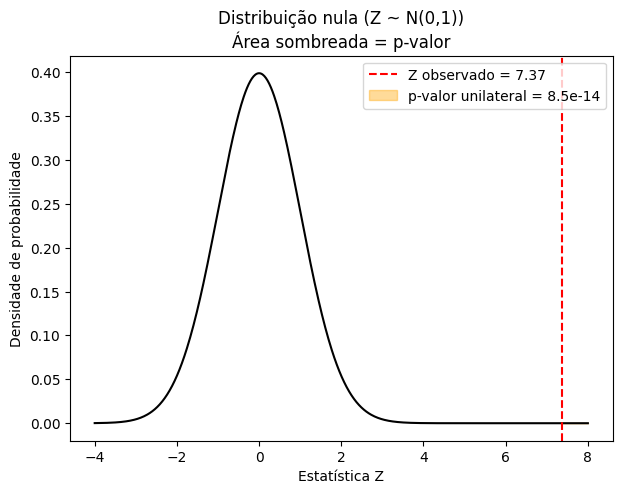

In [10]:
# Estatística Z e p-valor já calculados antes
z_obs = z_stat
p_val = p_value

# Eixo x e pdf da Normal(0,1)
xs = np.linspace(-4, 8, 600)
pdf = 1/np.sqrt(2*np.pi) * np.exp(-0.5*xs**2)

# Plot
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(xs, pdf, color='black')
ax.axvline(z_obs, color='red', linestyle='--', label=f"Z observado = {z_obs:.2f}")
mask = xs >= z_obs
ax.fill_between(xs, 0, pdf, where=mask, color='orange', alpha=0.4,
                label=f"p-valor unilateral = {p_val:.1e}")

ax.set_title("Distribuição nula (Z ~ N(0,1))\nÁrea sombreada = p-valor")
ax.set_xlabel("Estatística Z")
ax.set_ylabel("Densidade de probabilidade")
ax.legend()
plt.show()

##Conclusão

Com base na análise:

A campanha com anúncios foi bem-sucedida, pois o grupo exposto aos anúncios apresentou uma taxa de conversão maior (aproximadamente 2,5%) em comparação com o grupo de controle (cerca de 1,8%). Essa diferença (~0,7 ponto percentual) significa que proporcionalmente muito mais usuários compraram o produto quando viram os anúncios.

A diferença observada entre o grupo de teste e o grupo de controle é estatisticamente significativa. O teste A/B confirmou, com alto grau de confiança (p-valor ≪ 0,05), que a maior conversão no grupo dos anúncios não é aleatória, mas sim atribuível à campanha de marketing. Em termos de hipótese, rejeitamos H₀ e aceitamos H₁: a presença dos anúncios elevou significativamente a conversão.

Em resumo, os anúncios tiveram um efeito positivo e significativo nas vendas, indicando que a campanha de marketing gerou um aumento real nas conversões. Portanto, pode-se afirmar que a campanha foi efetiva, e a diferença de conversão entre os grupos de teste e controle pode ser diretamente atribuída à exposição aos anúncios (dentro do nível de confiança estabelecido).

Referências dos resultados: Os valores e conclusões aqui apresentados estão alinhados com análises prévias do mesmo dataset, que reportaram taxas de conversão de aproximadamente 1,8% (controle) vs 2,5% (teste) e constataram a significância estatística desta diferença em favor do grupo exposto aos anúncios. Isso reforça a confiabilidade dos achados de que a campanha publicitária aumentou as conversões de forma significativa.


### Resumo do seu Teste A/B

- **Controle (psa)**: n = 23,524, conv = 420, taxa = **1.79%**  
  IC95% (Wilson): **[1.62%, 1.96%]**

- **Tratamento (ad)**: n = 564,577, conv = 14,423, taxa = **2.55%**  
  IC95% (Wilson): **[2.51%, 2.60%]**

- **Diferença (ad − psa)**: **0.77 p.p.** (43.1% relativo)  
- **Teste bilateral**: z = 7.37, p = 1.71e-13  
- **Teste unilateral (ad > psa)**: z = 7.37, p = 8.53e-14  
- **Tamanho de efeito (Cohen’s h)**: 0.053  (≈0.2 pequeno, 0.5 médio, 0.8 grande)  
- **Poder (α=0,05, unilateral)**: 100.0% (aprox.)


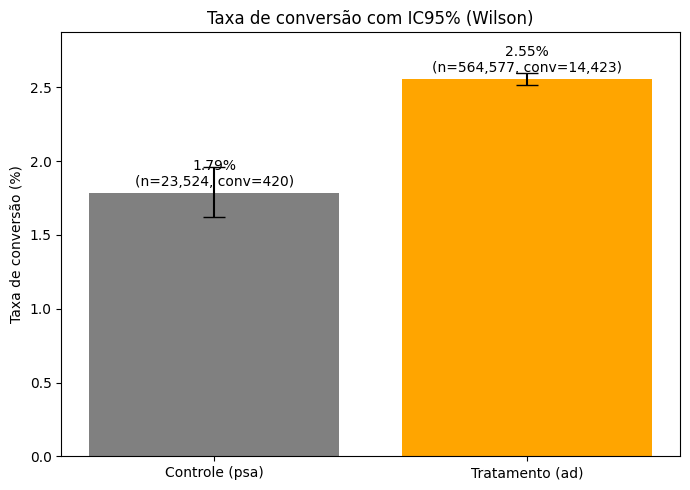

**P-valor (unilateral)**: área à direita do Z observado sob H₀ (Normal(0,1)).

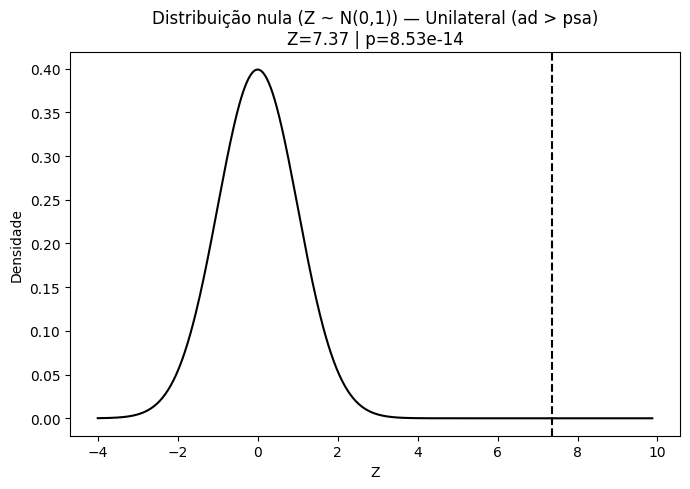

**Nível de significância (α)** e região crítica (unicaudal, α=0,05).

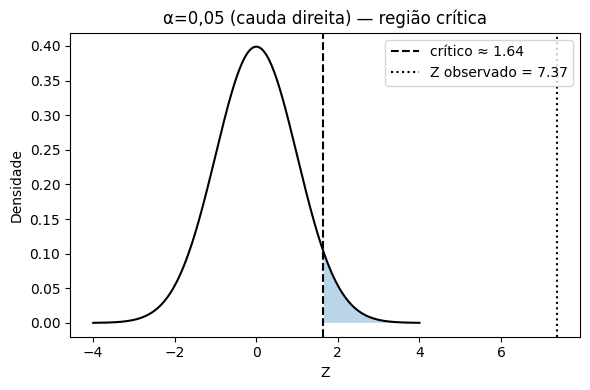

**Unilateral vs Bilateral**: no bilateral, o p-valor ocupa **duas** caudas; no unilateral, só a cauda direita.

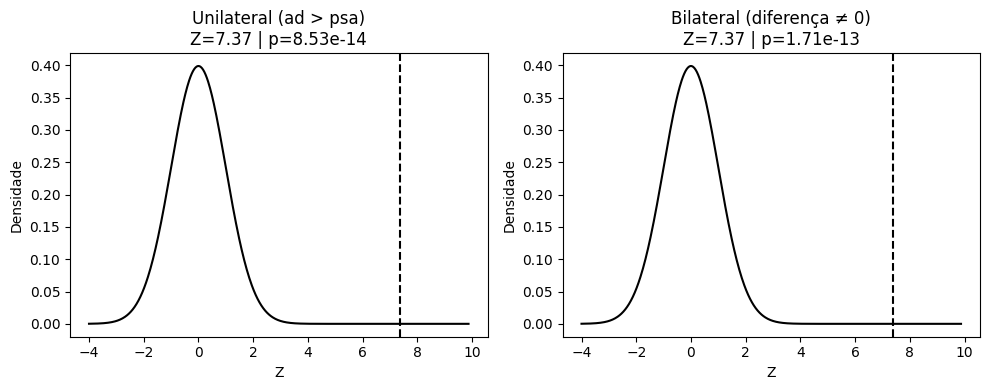


**Poder estatístico (aprox., α=0,05, unicaudal)**

- Diferença observada: **0.77 p.p.**  
- Erro padrão sob H₁ (não-pooled): 0.000889  
- z* necessário (α=0,05): 1.645  
- Parâmetro não-central (dif/SE): 8.657  
- **Poder estimado**: **100.0%**


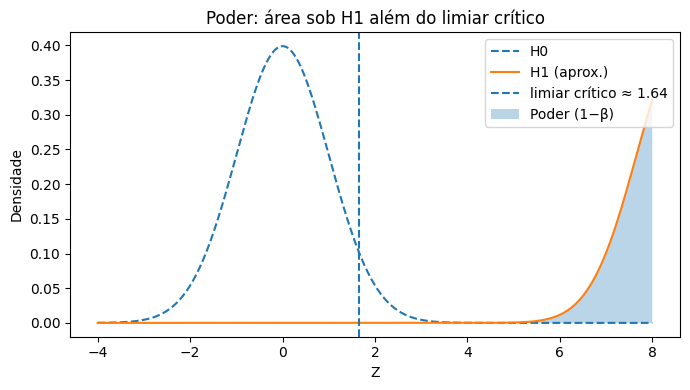

**Cohen’s h** calculado a partir das suas proporções: **h = 0.053**  (≈0.2 pequeno, 0.5 médio, 0.8 grande).

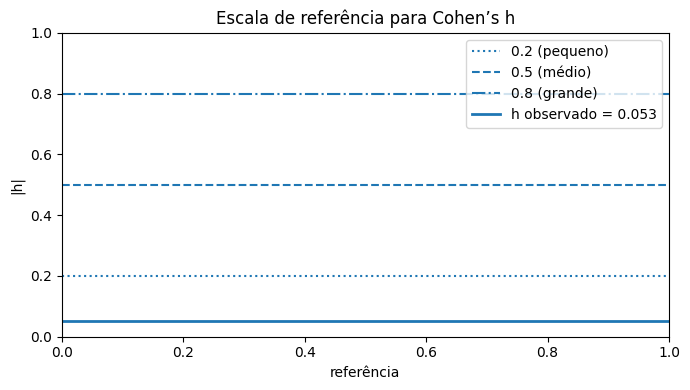

**Efeito do tamanho de amostra no IC (simulação multiplicando n por k)**

,k (multiplicador de n),Largura IC ad (p.p.),Largura IC psa (p.p.)
0,0.5,0.116409,0.479580
1,1.0,0.082314,0.338777
2,2.0,0.058204,0.239432
3,4.0,0.041156,0.169262


**Erros Tipo I (α) e Tipo II (β)** ilustrados no seu limiar crítico (unicaudal).

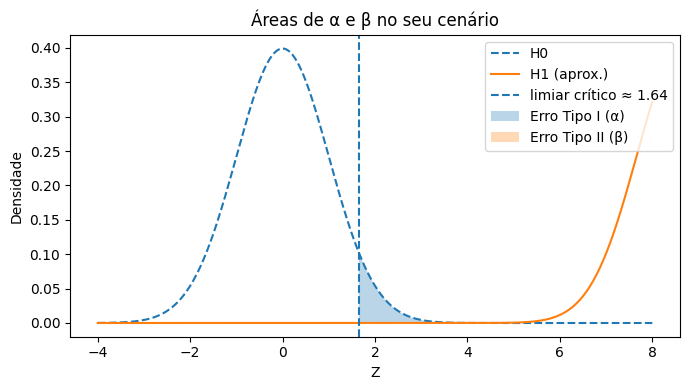

In [14]:
# @title Interface interativa com múltiplas abas para resultados do Teste A/B

# Bloco 1: preparar/validar dados e calcular métricas
# Requer: df (DataFrame) já carregado com colunas 'test group' e 'converted'

if 'df' not in globals() or not isinstance(df, pd.DataFrame):
    raise ValueError("Não encontrei o DataFrame 'df'. Certifique-se de já ter carregado o dataset.")

needed = {'test group','converted'}
if not needed.issubset(set(df.columns.str.lower())):
    raise ValueError(f"Colunas esperadas ausentes. Encontrei: {sorted(df.columns)}")

# padronizar nomes
df = df.rename(columns={c: c.lower().strip() for c in df.columns})

# converter converted -> bool
if df['converted'].dtype == 'O':
    df['converted'] = df['converted'].astype(str).str.strip().str.lower().map({
        'true': True, 'false': False, '1': True, '0': False, 'yes': True, 'no': False
    }).fillna(False).astype(bool)
elif pd.api.types.is_numeric_dtype(df['converted']):
    df['converted'] = (df['converted'] > 0).astype(bool)

# contagens
group_counts = df['test group'].value_counts()
conv_counts  = df.loc[df['converted'], 'test group'].value_counts()

# extrair métricas
n_ad  = int(group_counts.get('ad', 0))
n_psa = int(group_counts.get('psa', 0))
x_ad  = int(conv_counts.get('ad', 0))
x_psa = int(conv_counts.get('psa', 0))

if min(n_ad, n_psa) == 0:
    raise ValueError("Não encontrei ambos os grupos 'ad' e 'psa' no df.")

p_ad  = x_ad / n_ad
p_psa = x_psa / n_psa
diff = p_ad - p_psa
lift_rel = (p_ad / p_psa - 1) if p_psa > 0 else np.nan

# Testes estatísticos
z_two, p_two = sm.stats.proportions_ztest([x_ad, x_psa], [n_ad, n_psa], alternative='two-sided')
z_one, p_one = sm.stats.proportions_ztest([x_ad, x_psa], [n_ad, n_psa], alternative='larger')

# IC95% (Wilson)
ci_ad_low,  ci_ad_high  = proportion_confint(x_ad,  n_ad, method='wilson')
ci_psa_low, ci_psa_high = proportion_confint(x_psa, n_psa, method='wilson')

# Cohen's h
def cohens_h(p1, p2):
    return 2*np.arcsin(np.sqrt(p1)) - 2*np.arcsin(np.sqrt(p2))
h = cohens_h(p_ad, p_psa)

# Poder (aprox. unicaudal, alpha=0.05)
alpha = 0.05
z_alpha = norm.ppf(1 - alpha)  # ~1.645
se_h1 = np.sqrt(p_ad*(1-p_ad)/n_ad + p_psa*(1-p_psa)/n_psa)
if se_h1 > 0:
    z_noncentral = diff / se_h1
    power_est = 1 - norm.cdf(z_alpha - z_noncentral)
else:
    z_noncentral = np.nan
    power_est = np.nan

# Resumo textual
display(Markdown(f"""
### Resumo do seu Teste A/B

- **Controle (psa)**: n = {n_psa:,}, conv = {x_psa:,}, taxa = **{p_psa*100:.2f}%**
  IC95% (Wilson): **[{ci_psa_low*100:.2f}%, {ci_psa_high*100:.2f}%]**

- **Tratamento (ad)**: n = {n_ad:,}, conv = {x_ad:,}, taxa = **{p_ad*100:.2f}%**
  IC95% (Wilson): **[{ci_ad_low*100:.2f}%, {ci_ad_high*100:.2f}%]**

- **Diferença (ad − psa)**: **{diff*100:.2f} p.p.** ({lift_rel*100:.1f}% relativo)
- **Teste bilateral**: z = {z_two:.2f}, p = {p_two:.2e}
- **Teste unilateral (ad > psa)**: z = {z_one:.2f}, p = {p_one:.2e}
- **Tamanho de efeito (Cohen’s h)**: {h:.3f}  (≈0.2 pequeno, 0.5 médio, 0.8 grande)
- **Poder (α=0,05, unilateral)**: {power_est*100:.1f}% (aprox.)
"""))

# Bloco 2: gráfico de barras com IC95% (Wilson)
grupos = ['Controle (psa)', 'Tratamento (ad)']
taxas  = [p_psa*100, p_ad*100]
erro_inf = [(p_psa - ci_psa_low)*100, (p_ad - ci_ad_low)*100]
erro_sup = [(ci_psa_high - p_psa)*100, (ci_ad_high - p_ad)*100]

fig, ax = plt.subplots(figsize=(7,5))
bars = ax.bar(grupos, taxas, color=['gray','orange'])
ax.errorbar(grupos, taxas, yerr=[erro_inf, erro_sup], fmt='none', capsize=8, color='black')

for rect, taxa, n, x in zip(bars, taxas, [n_psa, n_ad], [x_psa, x_ad]):
    ax.text(rect.get_x()+rect.get_width()/2, taxa + max(erro_sup)*0.15,
            f"{taxa:.2f}%\n(n={n:,}, conv={x:,})", ha='center', va='bottom')

ax.set_ylabel("Taxa de conversão (%)")
ax.set_title("Taxa de conversão com IC95% (Wilson)")
ax.set_ylim(0, max(taxas)+max(erro_sup)*1.8)
plt.tight_layout(); plt.show()

# Bloco 3: p-valor (unilateral) na Normal(0,1)
display(Markdown("**P-valor (unilateral)**: área à direita do Z observado sob H₀ (Normal(0,1))."))

xs = np.linspace(-4, max(4, z_one+2.5), 600)
pdf = 1/np.sqrt(2*np.pi) * np.exp(-0.5*xs**2)

fig, ax = plt.subplots(figsize=(7,5))
ax.plot(xs, pdf, color='black')
ax.axvline(z_one, linestyle='--', color='black')
mask = xs >= z_one
ax.fill_between(xs, 0, pdf, where=mask, alpha=0.3)
ax.set_title(f"Distribuição nula (Z ~ N(0,1)) — Unilateral (ad > psa)\nZ={z_one:.2f} | p={p_one:.2e}")
ax.set_xlabel("Z"); ax.set_ylabel("Densidade")
plt.tight_layout(); plt.show()

# Bloco 4: α (unicaudal) + região crítica + Z observado
display(Markdown("**Nível de significância (α)** e região crítica (unicaudal, α=0,05)."))

crit = z_alpha  # ~1.645
x = np.linspace(-4, 4, 400)
pdf = 1/np.sqrt(2*np.pi) * np.exp(-0.5*x**2)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x, pdf, color='black')
ax.fill_between(x, 0, pdf, where=(x >= crit), alpha=0.3)
ax.axvline(crit, linestyle='--', color='black', label=f"crítico ≈ {crit:.2f}")
ax.axvline(z_one, linestyle=':', color='black', label=f"Z observado = {z_one:.2f}")
ax.set_title("α=0,05 (cauda direita) — região crítica")
ax.set_xlabel("Z"); ax.set_ylabel("Densidade"); ax.legend()
plt.tight_layout(); plt.show()

# Bloco 5: comparação Unilateral vs Bilateral
display(Markdown("**Unilateral vs Bilateral**: no bilateral, o p-valor ocupa **duas** caudas; no unilateral, só a cauda direita."))

xs = np.linspace(-4, max(4, abs(z_two)+2.5), 600)
pdf = 1/np.sqrt(2*np.pi) * np.exp(-0.5*xs**2)

fig, axes = plt.subplots(1,2, figsize=(10,4))

# Unilateral
axes[0].plot(xs, pdf, color='black')
axes[0].axvline(z_one, linestyle='--', color='black')
axes[0].fill_between(xs, 0, pdf, where=(xs >= z_one), alpha=0.3)
axes[0].set_title(f"Unilateral (ad > psa)\nZ={z_one:.2f} | p={p_one:.2e}")
axes[0].set_xlabel("Z"); axes[0].set_ylabel("Densidade")

# Bilateral
axes[1].plot(xs, pdf, color='black')
axes[1].axvline(z_two, linestyle='--', color='black')
mask = (xs >= abs(z_two)) | (xs <= -abs(z_two))
axes[1].fill_between(xs, 0, pdf, where=mask, alpha=0.3)
axes[1].set_title(f"Bilateral (diferença ≠ 0)\nZ={z_two:.2f} | p={p_two:.2e}")
axes[1].set_xlabel("Z"); axes[1].set_ylabel("Densidade")

plt.tight_layout(); plt.show()

# Bloco 6: poder (aproximação) usando seu efeito e n
display(Markdown(f"""
**Poder estatístico (aprox., α=0,05, unicaudal)**

- Diferença observada: **{diff*100:.2f} p.p.**
- Erro padrão sob H₁ (não-pooled): {se_h1:.6f}
- z* necessário (α=0,05): {z_alpha:.3f}
- Parâmetro não-central (dif/SE): {z_noncentral:.3f}
- **Poder estimado**: **{power_est*100:.1f}%**
"""))

x = np.linspace(-4, 8, 500)
pdf_H0 = 1/np.sqrt(2*np.pi) * np.exp(-0.5*x**2)
pdf_H1 = 1/np.sqrt(2*np.pi) * np.exp(-0.5*(x - z_noncentral)**2)

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x, pdf_H0, linestyle='--', label="H0")
ax.plot(x, pdf_H1, label="H1 (aprox.)")
ax.axvline(z_alpha, linestyle='--', label=f"limiar crítico ≈ {z_alpha:.2f}")
ax.fill_between(x, 0, pdf_H1, where=(x >= z_alpha), alpha=0.3, label="Poder (1−β)")
ax.set_xlabel("Z"); ax.set_ylabel("Densidade"); ax.legend()
ax.set_title("Poder: área sob H1 além do limiar crítico")
plt.tight_layout(); plt.show()

# Bloco 7: escala de referência de Cohen’s h
display(Markdown(f"**Cohen’s h** calculado a partir das suas proporções: **h = {h:.3f}**  "
                 "(≈0.2 pequeno, 0.5 médio, 0.8 grande)."))

fig, ax = plt.subplots(figsize=(7,4))
ax.axhline(0.2, linestyle=':', label='0.2 (pequeno)')
ax.axhline(0.5, linestyle='--', label='0.5 (médio)')
ax.axhline(0.8, linestyle='-.', label='0.8 (grande)')
ax.axhline(abs(h), linewidth=2, label=f"h observado = {abs(h):.3f}")
ax.set_ylim(0, 1.0)
ax.set_xlabel("referência"); ax.set_ylabel("|h|")
ax.set_title("Escala de referência para Cohen’s h")
ax.legend(); plt.tight_layout(); plt.show()

# Bloco 8: efeito do tamanho de amostra na largura do IC (simulação)
display(Markdown("**Efeito do tamanho de amostra no IC (simulação multiplicando n por k)**"))

ks = [0.5, 1, 2, 4]
rows = []
for k in ks:
    nA, nB = int(n_psa*k), int(n_ad*k)
    xA, xB = int(p_psa*nA), int(p_ad*nB)
    loA, hiA = proportion_confint(xA, nA, method='wilson')
    loB, hiB = proportion_confint(xB, nB, method='wilson')
    rows.append((k, (hiB-loB)*100, (hiA-loA)*100))

sim = pd.DataFrame(rows, columns=['k (multiplicador de n)', 'Largura IC ad (p.p.)', 'Largura IC psa (p.p.)'])
display(sim)

# Bloco 9: Erros Tipo I (α) e Tipo II (β) com seu limiar
display(Markdown("**Erros Tipo I (α) e Tipo II (β)** ilustrados no seu limiar crítico (unicaudal)."))

thr = z_alpha
x = np.linspace(-4, 8, 500)
pdf_H0 = 1/np.sqrt(2*np.pi) * np.exp(-0.5 * x**2)
pdf_H1 = 1/np.sqrt(2*np.pi) * np.exp(-0.5 * (x - z_noncentral)**2)

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x, pdf_H0, linestyle='--', label="H0")
ax.plot(x, pdf_H1, label="H1 (aprox.)")
ax.axvline(thr, linestyle='--', label=f"limiar crítico ≈ {thr:.2f}")
# α: cauda direita sob H0
ax.fill_between(x, 0, pdf_H0, where=(x >= thr), alpha=0.3, label="Erro Tipo I (α)")
# β: área sob H1 à esquerda do limiar
ax.fill_between(x, 0, pdf_H1, where=(x < thr), alpha=0.3, label="Erro Tipo II (β)")
ax.set_xlabel("Z"); ax.set_ylabel("Densidade"); ax.legend()
ax.set_title("Áreas de α e β no seu cenário")
plt.tight_layout(); plt.show()